In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
import anchors
import matplotlib
import itertools
import numpy as np
import anchors
%matplotlib notebook

In [9]:
CONFIG = [[1024, 1024, 32, 32, 32, 32, 4], 
          [1024, 1024, 32, 32, 64, 64, 2],
          [1024, 1024, 32, 32, 128, 128, 1],
          [1024, 1024, 64, 64, 256, 256, 1],
          [1024, 1024, 128, 128, 512, 512, 1]] 
boxes_vec, boxes_lst, stubs = anchors.get_boxes(CONFIG, True)

### Test anchor box generation

In [48]:
dim_x = 1024
dim_y = 1024
space_x = 128
space_y = 128
scale_x = 32
scale_y = 32
rate = 4

In [49]:
np.set_printoptions(suppress=True)

<IPython.core.display.Javascript object>


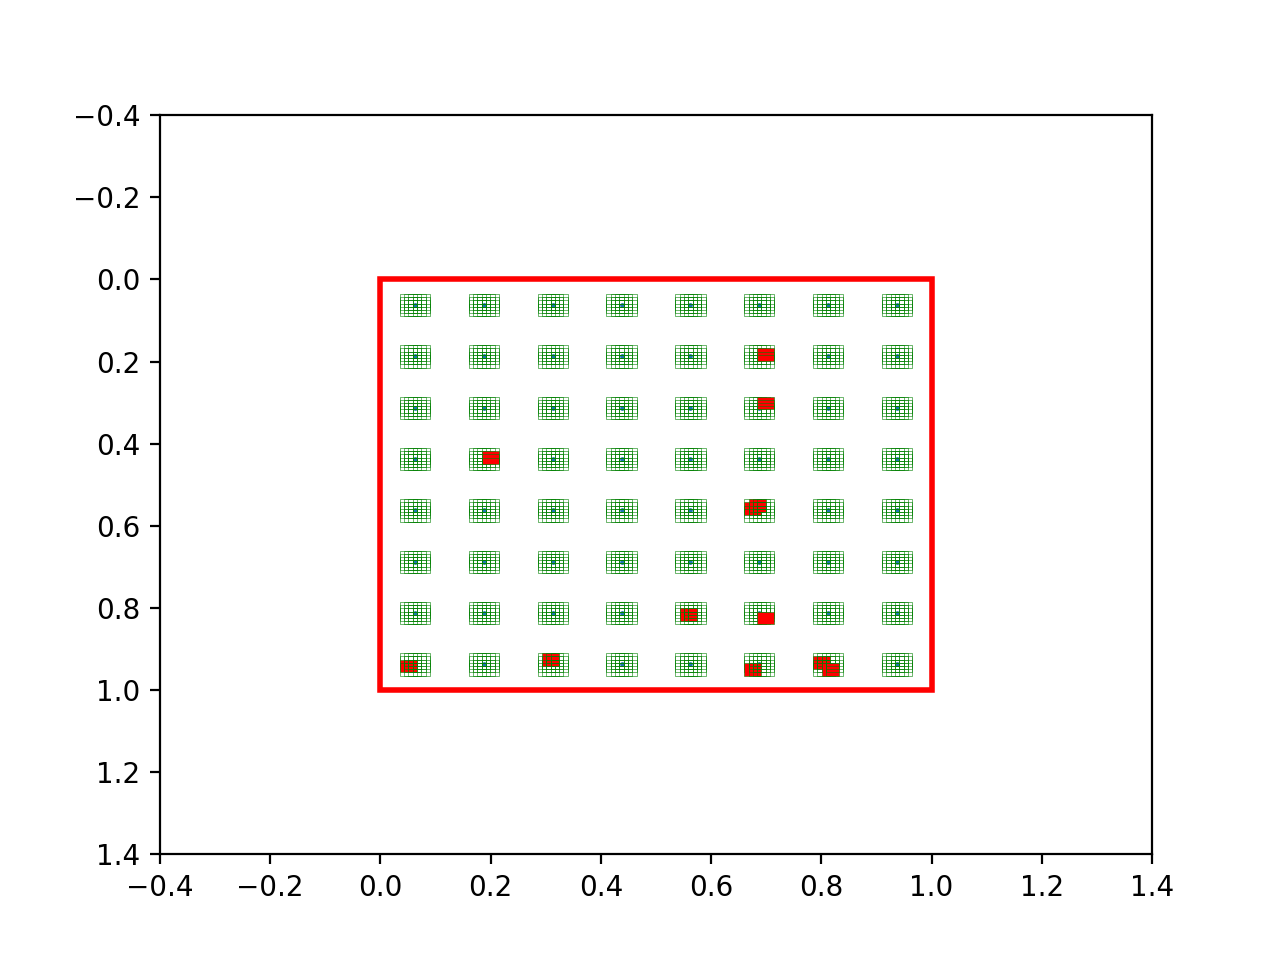

In [50]:
centers, boxes = anchors.get_anchor_boxes(dim_x, dim_y, space_x, space_y, scale_x, scale_y, rate, True)
centers = np.array(centers)
centers = np.reshape(centers, (-1, 2))

plt.figure()
plt.scatter(centers[:, 0], centers[:, 1], 0.5)
ax = plt.gca()

ax.set_xlim([-0.4, 1.4]) # Set consistent with OpenCV
ax.set_ylim([1.4, -0.4]) # Set consistent with OpenCV
patch = matplotlib.patches.Rectangle((0, 0), 1, 1,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(patch)
box_shape = boxes.shape
rand_shape = list(box_shape)
rand_shape[-1] = 1
random_shade = np.random.random_sample(rand_shape) > 0.99
for w, h, a in itertools.product(range(box_shape[0]), range(box_shape[1]), range(box_shape[2])):
    c_p = boxes[w, h, a]
    box_new = anchors.transform_ltbr_to_lbwh(c_p)
    if random_shade[w, h, a]:
        patch_cur = matplotlib.patches.Rectangle(box_new[0:2], box_new[2], box_new[3],linewidth=0.2,edgecolor='g',facecolor='red', zorder = 10)
    else:
        patch_cur = matplotlib.patches.Rectangle(box_new[0:2], box_new[2], box_new[3],linewidth=0.2,edgecolor='g',facecolor='none', zorder = 10)        
    ax.add_patch(patch_cur)
plt.show()

### Test anchor box re-generation from vector

In [51]:
shape_stub = anchors.get_shape_stub(dim_x, dim_y, space_x, space_y, rate)
boxes_c = np.reshape(boxes, (-1, 4))
random_shade_c = np.reshape(random_shade, (-1, 1))

<IPython.core.display.Javascript object>


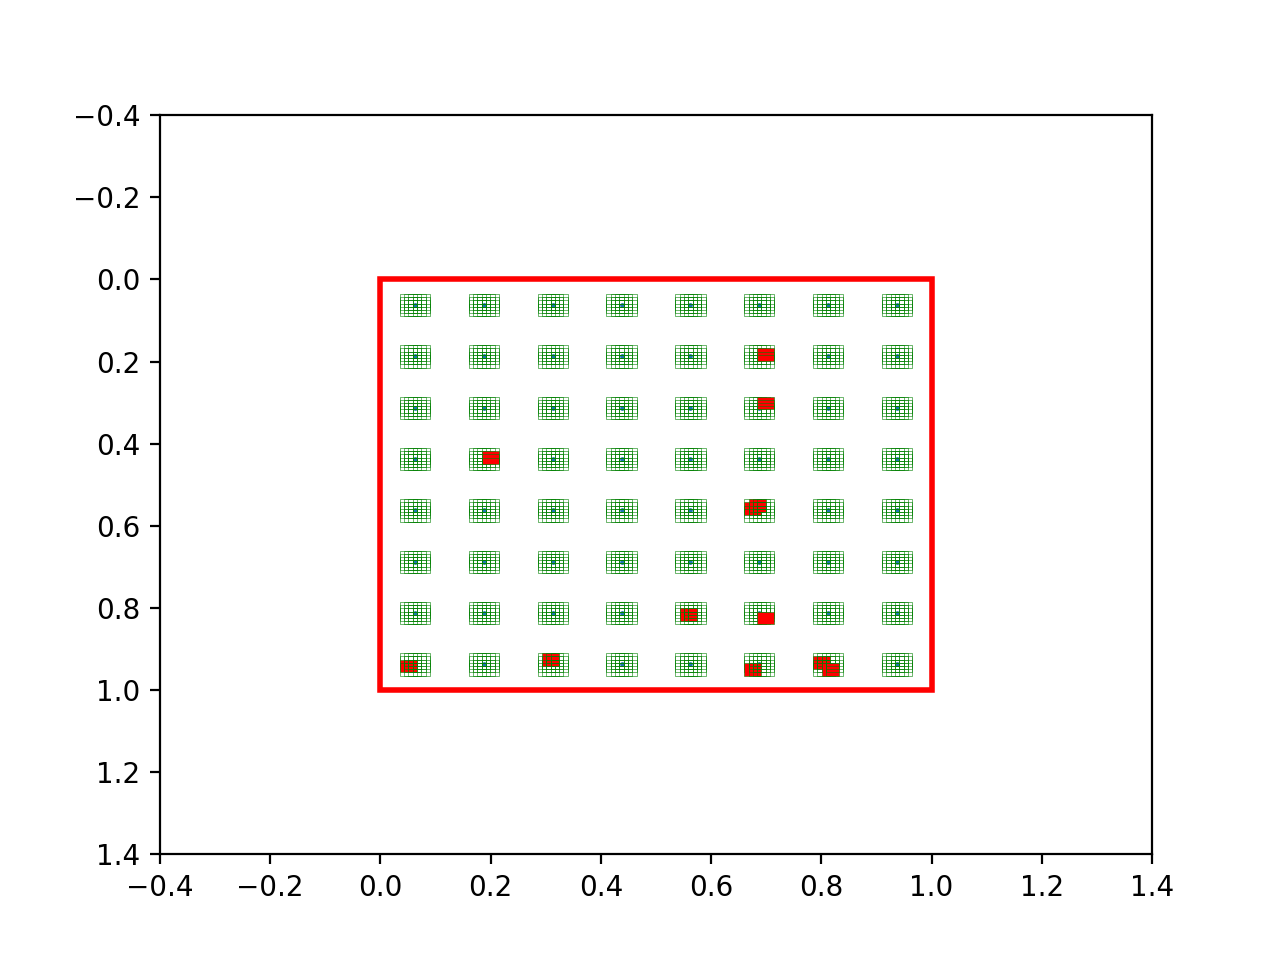

In [53]:
boxes_regen = np.reshape(boxes_c, shape_stub + [4])
random_regen = np.reshape(random_shade, shape_stub + [1])
plt.figure()
plt.scatter(centers[:, 0], centers[:, 1], 0.5)
ax = plt.gca()
ax.set_xlim([-0.4, 1.4]) # Set consistent with OpenCV
ax.set_ylim([1.4, -0.4]) # Set consistent with OpenCV
patch = matplotlib.patches.Rectangle((0, 0), 1, 1,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(patch)
for w, h, a in itertools.product(range(box_shape[0]), range(box_shape[1]), range(box_shape[2])):
    c_p = boxes_regen[w, h, a]
    box_new = anchors.transform_ltbr_to_lbwh(c_p)
    if random_regen[w, h, a]:
        patch_cur = matplotlib.patches.Rectangle(box_new[0:2], box_new[2], box_new[3],linewidth=0.2,edgecolor='g',facecolor='red')
    else:
        patch_cur = matplotlib.patches.Rectangle(box_new[0:2], box_new[2], box_new[3],linewidth=0.2,edgecolor='g',facecolor='none')        
    ax.add_patch(patch_cur)
plt.show()

### Test encode

In [55]:
print('Anchor Vector shapes: ', boxes_vec.shape)
print('Anchor Box shapes: ', [i.shape for i in boxes_lst])
print('Anchor Stub shapes: ', stubs)

Anchor Vector shapes:  (21824, 4)
Anchor Box shapes:  [(32, 32, 16, 4), (32, 32, 4, 4), (32, 32, 1, 4), (16, 16, 1, 4), (8, 8, 1, 4)]
Anchor Stub shapes:  [(32, 32, 16), (32, 32, 4), (32, 32, 1), (16, 16, 1), (8, 8, 1)]
